In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D
from keras.optimizers import Adadelta,RMSprop
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical
print("All modules loaded Successfully")

Using TensorFlow backend.


All modules loaded Successfully


In [2]:
# loading the data 

(xtr,ytr),(xts,yts) = mnist.load_data()
print("Training Samples : ",xtr.shape[0])
print("Testing Samples : ",xts.shape[0])
batch_size = 86
print("Batch-Size : ",batch_size)
num_classes = 10
print("How many different character ? -> ",num_classes)
epochs = 10
print("No of Epochs : ",epochs)
img_rows , img_cols = 28,28

11493376/11490434 [==============================] - 1s 0us/step
Training Samples :  60000
Testing Samples :  10000
Batch-Size :  86
How many different character ? ->  10
No of Epochs :  10


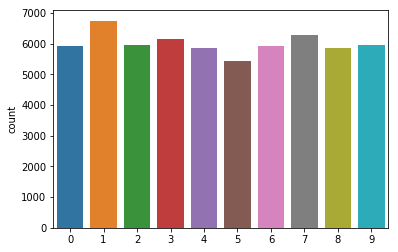

In [3]:
## Shows the dataset frequency
## for example : we have around 6000 images of 0 
train_plot = sns.countplot(ytr)

In [0]:
# https://www.codesofinterest.com/2017/09/keras-image-data-format.html

# tensorflow expect the data in (row, cols, channel) where as,
# theano -> (channel, rows, cols)


## in first layer of model.conv2d(data_format="channels_first")

if k.image_data_format () == "channels_first":
    xtr = xtr.reshape(xtr.shape[0],1,img_rows,img_cols)
    xts = xts.reshape(xts.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows,img_cols)
else:
    xtr = xtr.reshape(xtr.shape[0],img_rows,img_cols,1)
    xts = xts.reshape(xts.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows,img_cols,1)

In [5]:
# data cleanup and normalization
xtr = xtr.astype("float32")
xts = xts.astype("float32")

# makes our image 
xtr /= 255
xts /= 255
print("Shape of training data : ",xtr.shape)
print("Shape of testing data : ",xts.shape)
# Changing the output to -> 1 0 0 0 0 0 0 0 0 0
ytr = to_categorical(ytr,num_classes)
yts = to_categorical(yts,num_classes)

Shape of training data :  (60000, 28, 28, 1)
Shape of testing data :  (10000, 28, 28, 1)


Training output :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


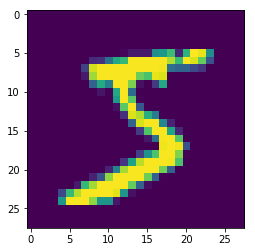

In [6]:
# Testing whether data is properly formatted and in sync
plt.title=("Testing Image")
plt.imshow(xtr[0][:,:,0])
print("Training output : ",ytr[0])

In [7]:
model = Sequential()
# 1 ->
model.add(Conv2D(filters = 32,kernel_size = (5,5) ,activation = 'relu' ,padding = 'same',input_shape=(28,28,1)))
model.add(Conv2D(filters = 32,kernel_size = (5,5) ,activation = 'relu' ,padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
# 2 ->
model.add(Conv2D(filters = 64,kernel_size = (3,3) ,activation = 'relu' ,padding = 'same'))
model.add(Conv2D(filters = 64,kernel_size = (3,3) ,activation = 'relu' ,padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Dropout(0.25))
# 3 ->
model.add(Flatten())
#4 ->
model.add(Dense(256,activation = 'relu'))
# 5 ->
model.add(Dropout(0.5))
# 6 ->
model.add(Dense(num_classes,activation='softmax'))

# Summary of model - ::
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     


In [0]:
# Setting optimizer and Annealers(Learning Rate)
optimizer = RMSprop(lr = 0.001,rho = 0.9,decay = 0.0,epsilon = 1e-8)

In [9]:
# Compiling our model with optimizer, loss, metrics
model.compile(optimizer = optimizer,loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [0]:
# Decreasing learning rate as we go
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',
                                           patience = 3,
                                           factor = 0.5,
                                           verbose = 1,
                                           min_lr = 0.00001)

In [0]:
# Data Augmentation
# Generate batches of tensor image data with real-time data augmentation.
datagen = ImageDataGenerator(rotation_range = 10, # how much we want our image to be roated
                            zoom_range = 0.1, # zoom range on image
                            width_shift_range = 0.1, # change in width
                            height_shift_range = 0.1, # change in height
                            horizontal_flip = False,
                            vertical_flip = False,
                            featurewise_center = False,
                            samplewise_center = False,
                            featurewise_std_normalization = False,
                            samplewise_std_normalization = False,
                            zca_whitening = False)

In [0]:
#  do the data augmentation on our training set!
datagen.fit(xtr)

In [0]:
# run our model !!
history = model.fit_generator(datagen.flow(xtr,ytr,batch_size = batch_size), # datagen.flow -> for data augmentation
                              epochs = epochs, # how many forward and backward pass of our training data! 
                              validation_data = (xts,yts), # validating on training set
                              verbose = 1, # shows the op
                             steps_per_epoch = xtr.shape[0], 
                             callbacks = [learning_rate_reduction]) # learning rate reducing as we go!

In [14]:
# checking for gpu :p
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
# beautiful plot of our loss and accuracy <3
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.savefig("loss.png")

score = model.evaluate(xts, yts, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [0]:
# saving the model!
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [0]:
# reload the model and check wether our model is working or not!!
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


In [0]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))